In [70]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\weien\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\weien\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\weien\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [72]:
df = pd.read_csv("Reviews.csv") #load data in

In [73]:
df.shape

(568454, 10)

In [74]:
df = df.sample(n=5000, random_state=42).reset_index(drop=True)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,165257,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...
1,231466,B0000BXJIS,A3U62RE5XZDP0G,Marty,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...
2,427828,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...
3,433955,B006BXV14E,A3PWPNZVMNX3PA,rareoopdvds,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin..."
4,70261,B007I7Z3Z0,A1XNZ7PCE45KK7,Og8ys1,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...


In [75]:
df['Score'].value_counts().sort_index()

Score
1     455
2     248
3     378
4     701
5    3218
Name: count, dtype: int64

<Axes: title={'center': 'Count of Reviews by Stars'}, xlabel='Score'>

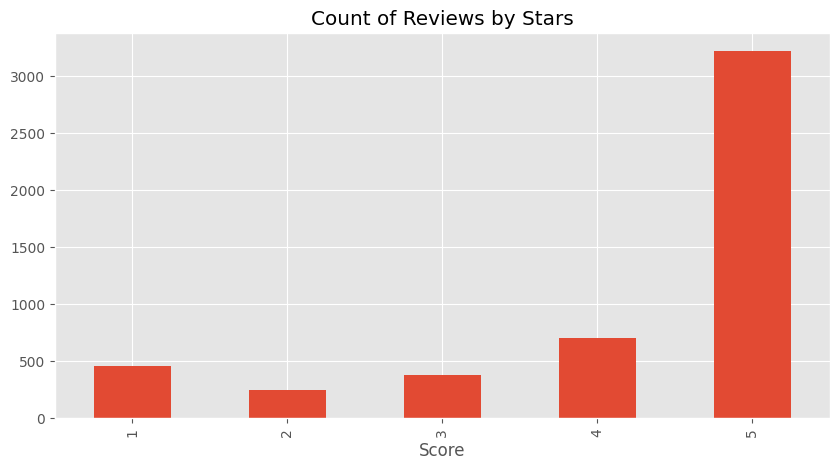

In [76]:
df['Score'].value_counts().sort_index().plot( kind='bar', title='Count of Reviews by Stars', figsize=(10, 5))

In [77]:
example = df['Text'][50]
print(example)

With a legendary name like Gevalia, I was disappointed to find that the coffee contains artificial flavors.  The outside packaging looks gourmet and epicurean, with gold lettering.  Unfortunately, artificial flavoring also plainly occupies the front face.<br /><br />The aroma from the coffee is quite pleasant, however, after brewing, the coffee itself is nothing to write home about.  In fact, it tasted rather bitter.<br /><br />I would not buy this item.


In [78]:
nltk.download('punkt')
nltk.word_tokenize(example)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\weien\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['With',
 'a',
 'legendary',
 'name',
 'like',
 'Gevalia',
 ',',
 'I',
 'was',
 'disappointed',
 'to',
 'find',
 'that',
 'the',
 'coffee',
 'contains',
 'artificial',
 'flavors',
 '.',
 'The',
 'outside',
 'packaging',
 'looks',
 'gourmet',
 'and',
 'epicurean',
 ',',
 'with',
 'gold',
 'lettering',
 '.',
 'Unfortunately',
 ',',
 'artificial',
 'flavoring',
 'also',
 'plainly',
 'occupies',
 'the',
 'front',
 'face.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'The',
 'aroma',
 'from',
 'the',
 'coffee',
 'is',
 'quite',
 'pleasant',
 ',',
 'however',
 ',',
 'after',
 'brewing',
 ',',
 'the',
 'coffee',
 'itself',
 'is',
 'nothing',
 'to',
 'write',
 'home',
 'about',
 '.',
 'In',
 'fact',
 ',',
 'it',
 'tasted',
 'rather',
 'bitter.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'I',
 'would',
 'not',
 'buy',
 'this',
 'item',
 '.']

In [97]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['With',
 'a',
 'legendary',
 'name',
 'like',
 'Gevalia',
 ',',
 'I',
 'was',
 'disappointed']

In [92]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

def clean_text(text):
    for row in text:
        row = text.lower()
        # row = ' '.join(row.split())
        row = ''.join(i for i in row if not i.isdigit())
        # row != ' '.join(i for i in row if not i.isdigit())
        tokens = word_tokenize(row)
        
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

        return ' '.join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\weien\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\weien\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [89]:
df['Cleaned_Text'] = df['Text'].apply(clean_text)
print(df['Cleaned_Text'].head())

0    tried couple brands sandwich cookies best bunc...
1    cat loves treats ever ca find house pop top bo...
2    little less expected tends muddy taste expecte...
3    first frosted original size frosted bite size ...
4    want congratulate graphic artist putting entir...
Name: Cleaned_Text, dtype: object


In [98]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('With', 'IN'),
 ('a', 'DT'),
 ('legendary', 'JJ'),
 ('name', 'NN'),
 ('like', 'IN'),
 ('Gevalia', 'NNP'),
 (',', ','),
 ('I', 'PRP'),
 ('was', 'VBD'),
 ('disappointed', 'VBN')]

In [99]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  With/IN
  a/DT
  legendary/JJ
  name/NN
  like/IN
  (GPE Gevalia/NNP)
  ,/,
  I/PRP
  was/VBD
  disappointed/VBN
  to/TO
  find/VB
  that/IN
  the/DT
  coffee/NN
  contains/VBZ
  artificial/JJ
  flavors/NNS
  ./.
  The/DT
  outside/JJ
  packaging/NN
  looks/VBZ
  gourmet/JJ
  and/CC
  epicurean/JJ
  ,/,
  with/IN
  gold/JJ
  lettering/NN
  ./.
  Unfortunately/RB
  ,/,
  artificial/JJ
  flavoring/NN
  also/RB
  plainly/RB
  occupies/VBZ
  the/DT
  front/NN
  face./NN
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/VBZ
  The/DT
  aroma/NN
  from/IN
  the/DT
  coffee/NN
  is/VBZ
  quite/RB
  pleasant/JJ
  ,/,
  however/RB
  ,/,
  after/IN
  brewing/NN
  ,/,
  the/DT
  coffee/NN
  itself/PRP
  is/VBZ
  nothing/NN
  to/TO
  write/VB
  home/NN
  about/IN
  ./.
  In/IN
  fact/NN
  ,/,
  it/PRP
  tasted/VBD
  rather/RB
  bitter./JJ
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NN
  I/PRP
  would/MD
  not/RB
  buy/VB
  this/DT
  item/NN
  ./.)


In [101]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\weien\AppData\Roaming\nltk_data...


In [102]:
sia

In [103]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [104]:
example = "I am so happy!"
example = example.split(' ')
print(example)

['I', 'am', 'so', 'happy!']


In [105]:
for word in example:
    print("Score of", word, "is:", sia.polarity_scores(word))

Score of I is: {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Score of am is: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Score of so is: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Score of happy! is: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6114}


In [106]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [107]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [108]:
example

['I', 'am', 'so', 'happy!']

In [109]:
res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Cleaned_Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [110]:
vaders = pd.DataFrame(res).T
vaders

,neg,neu,pos,compound
165257,0.000,0.538,0.462,0.9661
231466,0.037,0.566,0.398,0.9670
427828,0.000,0.769,0.231,0.4588
433955,0.014,0.712,0.275,0.9899
70261,0.066,0.574,0.360,0.9735
...,...,...,...,...
370837,0.287,0.532,0.181,-0.2500
135373,0.066,0.616,0.318,0.9741
268329,0.000,0.481,0.519,0.8689
29455,0.074,0.621,0.305,0.8316


In [111]:
!pip install transformers

In [114]:
!pip install torch

     ---------------------------------------- 0.0/5.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.7 MB 1.4 MB/s eta 0:00:05
     ---------------------------------------- 0.1/5.7 MB 991.0 kB/s eta 0:00:06
     - -------------------------------------- 0.2/5.7 MB 1.7 MB/s eta 0:00:04
     - -------------------------------------- 0.3/5.7 MB 1.7 MB/s eta 0:00:04
     -- ------------------------------------- 0.4/5.7 MB 1.6 MB/s eta 0:00:04
     -- ------------------------------------- 0.4/5.7 MB 1.6 MB/s eta 0:00:04
     --- ------------------------------------ 0.5/5.7 MB 1.5 MB/s eta 0:00:04
     ---- ----------------------------------- 0.6/5.7 MB 1.7 MB/s eta 0:00:04
     ---- ----------------------------------- 0.7/5.7 MB 1.7 MB/s eta 0:00:04
     ----- ---------------------------------- 0.7/5.7 MB 1.7 MB/s eta 0:00:04
     ----- ---------------------------------- 0.8/5.7 MB 1.7 MB/s eta 0:00:03
     ------ --------------------------------- 0.9/5.7 MB 1.6 MB/s eta

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\weien\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\torch\\_inductor\\decomposition.py'
Consider using the `--user` option or check the permissions.



  Using cached torch-2.1.1-cp311-cp311-win_amd64.whl.metadata (26 kB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached MarkupSafe-2.1.3-cp311-cp311-win_amd64.whl.metadata (3.1 kB)
Using cached torch-2.1.1-cp311-cp311-win_amd64.whl (192.3 MB)
Using cached MarkupSafe-2.1.3-cp311-cp311-win_amd64.whl (17 kB)


In [115]:
!pip install torch torchvision torchaudio cpuonly -c pytorch

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'pytorch'


In [116]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [117]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

c:\Users\weien\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\weien\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [118]:
example = df['Cleaned_Text'][50]
print(example)

legendary name like gevalia disappointed find coffee contains artificial flavors outside packaging looks gourmet epicurean gold lettering unfortunately artificial flavoring also plainly occupies front br br aroma coffee quite pleasant however brewing coffee nothing write home fact tasted rather br br would buy item


In [119]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.25987375, 'roberta_neu': 0.48920235, 'roberta_pos': 0.2509239}


In [120]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [121]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Cleaned_Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/5000 [00:00<?, ?it/s]

Broke for id 157118
Broke for id 52278
Broke for id 242726
Broke for id 165555
Broke for id 497902


In [122]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [123]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text', 'Cleaned_Text'],
      dtype='object')